# Code Excercises

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

Exercise 5-1.
This exercise will help you gain familiarity with indexing matrix elements. Create a
3 × 4 matrix using np.arange(12).reshape(3,4). Then write Python code to extract
the element in the second row, fourth column. Use softcoding so that you can select
different row/column indices. Print out a message like the following:
The matrix element at index (2,4) is 7

In [2]:
a = np.arange(12).reshape(3, 4)

sli = a[1,3]
sli

7

Exercise 5-2.
This and the following exercise focus on slicing matrices to obtain submatrices. Start
by creating matrix C in Figure 5-6, and use Python slicing to extract the submatrix
comprising the first five rows and five columns. Let’s call this matrix C1. Try to
reproduce Figure 5-6, but if you are struggling with the Python visualization coding,
then just focus on extracting the submatrix correctly

In [3]:
c = np.arange(100).reshape(10, 10)
C = c[0:5:1, 0:5:1]
print(f'Slice c : {C}')

Slice c : [[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


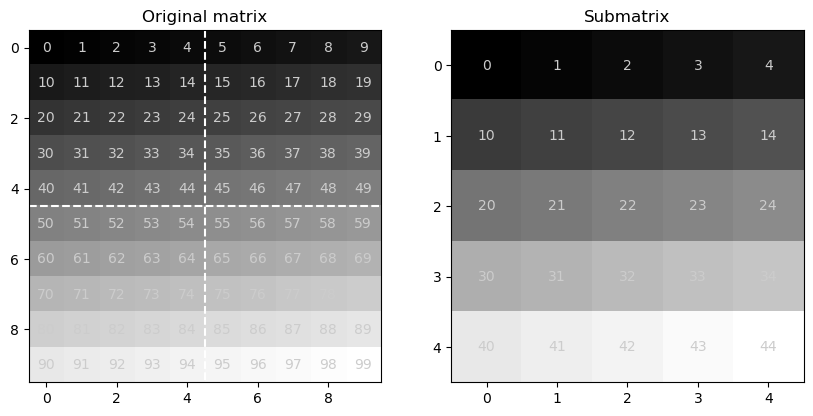

In [4]:
fix, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].imshow(c, cmap = 'gray', origin = 'upper', vmin = 0, vmax = np.max(c))
ax[0].plot([4.5, 4.5], [-.5, 9.5], 'w--')
ax[0].plot([-.5, 9.5], [4.5, 4.5], 'w--')
ax[0].set_title('Original matrix')

for (j, i), num in np.ndenumerate(c) : 
    ax[0].text(i, j, num, color = [.8, .8, .8], ha = 'center', va = 'center')

ax[1].imshow(C, cmap = 'gray', origin = 'upper', vmin = 0, vmax = np.max(C))
ax[1].set_title('Submatrix')

for (j, i), num in np.ndenumerate(C) : 
    ax[1].text(i, j, num, color = [.8, .8, .8], ha = 'center', va = 'center')

plt.show()

Exercise 5-3.
Expand this code to extract the other four 5 × 5 blocks. Then create a new matrix
with those blocks reorganized according to Figure 5-7

In [5]:
C_1 = c[5:10:1, 5:10:1]
C_2 = c[5:10:1, 0:5:1]
C_3 = c[0:5:1, 5:10:1]
C_4 = c[0:5:1, 0:5:1]

new_matrix = np.vstack((
    np.hstack((C_1, C_2)), 
    np.hstack((C_3, C_4))
))

new_matrix


array([[55, 56, 57, 58, 59, 50, 51, 52, 53, 54],
       [65, 66, 67, 68, 69, 60, 61, 62, 63, 64],
       [75, 76, 77, 78, 79, 70, 71, 72, 73, 74],
       [85, 86, 87, 88, 89, 80, 81, 82, 83, 84],
       [95, 96, 97, 98, 99, 90, 91, 92, 93, 94],
       [ 5,  6,  7,  8,  9,  0,  1,  2,  3,  4],
       [15, 16, 17, 18, 19, 10, 11, 12, 13, 14],
       [25, 26, 27, 28, 29, 20, 21, 22, 23, 24],
       [35, 36, 37, 38, 39, 30, 31, 32, 33, 34],
       [45, 46, 47, 48, 49, 40, 41, 42, 43, 44]])

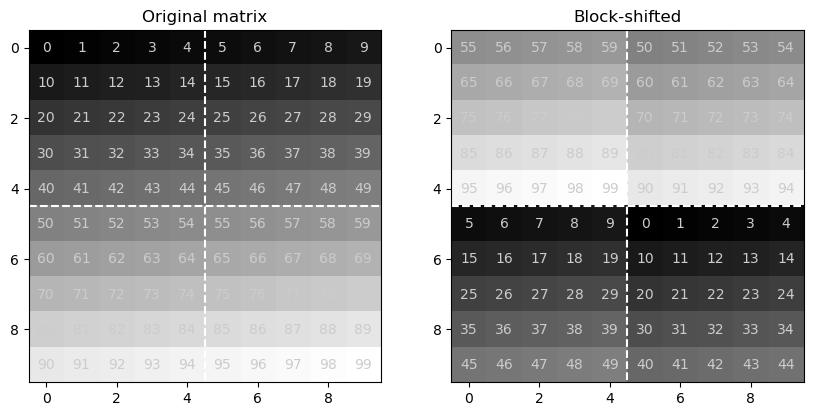

In [6]:
fix, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].imshow(c, cmap = 'gray', origin = 'upper', vmin = 0, vmax = np.max(c))
ax[0].plot([4.5, 4.5], [-.5, 9.5], 'w--')
ax[0].plot([-.5, 9.5], [4.5, 4.5], 'w--')
ax[0].set_title('Original matrix')

for (j, i), num in np.ndenumerate(c) : 
    ax[0].text(i, j, num, color = [.8, .8, .8], ha = 'center', va = 'center')

ax[1].imshow(new_matrix, cmap = 'gray', origin = 'upper', vmin = 0, vmax = np.max(new_matrix))
ax[1].plot([4.5, 4.5], [-.5, 9.5], 'w--')
ax[1].plot([-.5, 9.5], [4.5, 4.5], 'w--')
ax[1].set_title('Block-shifted')

for (j, i), num in np.ndenumerate(new_matrix) : 
    ax[1].text(i, j, num, color = [.8, .8, .8], ha = 'center', va = 'center')

plt.show()

Exercise 5-4.
Implement matrix addition element-wise using two for loops over rows and columns. What happens when you try to add two matrices with mismatching sizes? This exercise will help you think about breaking down a matrix into rows, columns, and
individual elements.

In [7]:
def addition_matrix(m1 :np.array, m2 :np.array) : 
    if m1.shape != m2.shape : return None 

    res = np.zeros(m1.shape)
    for i in range(m1.shape[0]) : 
        for j in range(m1.shape[1]) : 
            res[i, j] = m1[i, j] + m2[i, j]

    return res

In [8]:
w = np.random.randn(2, 3)
m = np.random.randn(2, 3)
print(f'Using + operation: {w + m}')
print(f'Using my function: {addition_matrix(w, m)}')

Using + operation: [[-1.62298501 -1.05858895 -1.39235545]
 [-1.77101465  1.36355696  1.43784538]]
Using my function: [[-1.62298501 -1.05858895 -1.39235545]
 [-1.77101465  1.36355696  1.43784538]]


Exercise 5-5.
Matrix addition and scalar multiplication obey the mathematical laws of commutivity
and distributivity. That means that the following equations give the same results
(assume that the matrices A and B are the same size and that σ is some scalar):
σ A + B = σA + σB = Aσ + Bσ
Rather than proving this mathematically, you are going to demonstrate it through
coding. In Python, create two random-numbers matrices of size 3 × 4 and a random
scalar. Then implement the three expressions in the previous equation. You’ll need to
figure out a way to confirm that the three results are equal. Keep in mind that tiny
computer precision errors in the range of 10−15 should be ignored

In [9]:
A = np.random.randn(3, 4)
B = np.random.randn(3, 4)

n = np.random.randint(low = 0, high = 10, size = 1)

exp1 = n * (A + B)
exp2 = n * A + n * B 
exp3 = A  * n + B * n 

print(np.round(exp1 - exp2, 8))
print(np.round(exp2 - exp3, 8))

[[-0.  0.  0. -0.]
 [ 0.  0. -0.  0.]
 [ 0.  0.  0.  0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


Exercise 5-6.
Code matrix multiplication using for loops. Confirm your results against using the
numpy @ operator. This exercise will help you solidify your understanding of matrix
multiplication, but in practice, it’s always better to use @ instead of writing out a
double for loop.

In [10]:
def standar_multiplication(m1 :np.array, m2: np.array) : 
    if m1.shape[1] != m2.shape[0] and m1.shape[0] != m2.shape[1] : return None 

    if m1.shape[0] == m2.shape[0] : m1, m2 = m2, m1

    res = np.zeros((m1.shape[0], m2.shape[1]))
    for i in range(m1.shape[0]) : 
        for j in range(m2.shape[1]) : 
            res[i,j] = np.dot(m1[i,:], m2[:, j])

    return res

In [11]:
w = np.random.randn(2, 3)
t = np.random.randn(3, 4)

print(f'My function: {standar_multiplication(w, t)}')
print(f'Using @ operation: {w @ t}')

My function: [[ 3.28165869  0.8318909   0.25276071  2.13554202]
 [-4.20819716 -2.83880838  1.04528296 -1.5645722 ]]
Using @ operation: [[ 3.28165869  0.8318909   0.25276071  2.13554202]
 [-4.20819716 -2.83880838  1.04528296 -1.5645722 ]]


Exercise 5-7.
Confirm the LIVE EVIL rule using the following five steps: (1) Create four matrices
of random numbers, setting the sizes to be L ∈ ℝ
2 × 6
, I ∈ ℝ
6 × 3
, V ∈ ℝ
3 × 5, and
E ∈ ℝ
5 × 2. (2) Multiply the four matrices and transpose the product. (3) Transpose
each matrix individually and multiply them without reversing their order. (4) Trans‐
pose each matrix individually and multiply them reversing their order according to
the LIVE EVIL rule. Check whether the result of step 2 matches the results of step 3
and step 4. (5) Repeat the previous steps but using all square matrices.


In [12]:
L = np.random.randn(2,6)
I = np.random.randn(6, 3)
V = np.random.randn(3,5)
E = np.random.randn(5,2)

In [13]:
res1 = (L@I@V@E).T
res2 = E.T@ V.T @  I.T @  L.T
print(np.round(res2 - res1, 8))

[[ 0.  0.]
 [-0. -0.]]


Exercise 5-8.
In this exercise, you will write a Python function that checks whether a matrix is
symmetric. It should take a matrix as input, and should output a boolean True if
the matrix is symmetric or False if the matrix is nonsymmetric. Keep in mind that
small computer rounding/precision errors can make “equal” matrices appear unequal.Therefore, you will need to test for equality with some reasonable tolerance. Test the
function on symmetric and nonsymmetric matrices


In [14]:
def is_symmetric_matrix(m : np.array) : 
    if m.shape[0] != m.shape[1] : return False 

    res = m == m.T 
    return np.sum(res) == m.shape[0] * m.shape[1]

In [15]:
t = np.random.randn(2, 3)

print(f'My function: {is_symmetric_matrix(t @  t.T)}')

My function: True


Exercise 5-9.
I mentioned that there is an additive method for creating a symmetric matrix from a
nonsymmetric square matrix. The method is quite simple: average the matrix with its
transpose. Implement this algorithm in Python and confirm that the result really is
symmetric. (Hint: you can use the function you wrote in the previous exercise!)


In [16]:
A = np.random.randn(4, 4)
AtA = (A + A.T) / 2 

print(is_symmetric_matrix(A))
print(is_symmetric_matrix(AtA))

False
True


Exercise 5-10.
Repeat the second part of Exercise 3-3 (the two vectors in ℝ
3
), but use matrix-vector
multiplication instead of vector-scalar multiplication. That is, compute As instead of
σ1v1 + σ2v2.


In [17]:
import plotly.graph_objects as go 

s = np.arange(6).reshape(2,3)

x_lim = [-5, 5]

A = np.random.uniform(low= 0, high = 100, size = (100,  2))

point = A @ s 

fig = go.Figure(data = [
    go.Scatter3d(x = point[:, 0], y = point[:, 1], z = point[:, 2], mode = 'markers')
])
fig.update_layout(
    autosize=False,
    width=800,
    height=500,
)

fig.show()

Exercise 5-11.
Diagonal matrices have many interesting properties that make them useful to work
with. In this exercise, you will learn about two of those properties:
- Premultiplying by a diagonal matrix scales the rows of the right matrix by the
corresponding diagonal elements.
- Postmultiplying by a diagonal matrix scales the columns of the left matrix by the
corresponding diagonal elements

In [18]:
first = np.ones((4,4))
second = np.diag(np.arange(1, 5) ** 2 )
third = np.sqrt(second)

In [19]:
# nhân trước làm scale giá trị của ma trận phải theo hàng
pre_multiply = second @ first
print(f'Pre-multiply by diagonal {pre_multiply}')

Pre-multiply by diagonal [[ 1.  1.  1.  1.]
 [ 4.  4.  4.  4.]
 [ 9.  9.  9.  9.]
 [16. 16. 16. 16.]]


In [20]:
# nhân sau làm scale giá trị của ma trận trái theo cột
post_multiply = first @ second  
print(f'Post-multiply by diagonal: {post_multiply}')


Post-multiply by diagonal: [[ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]
 [ 1.  4.  9. 16.]]


In [22]:
# cả hàng và cột đều được scale 
both = second @ first @ second 
print(f'Pre- and post- multiply by sqrt-diagonal: {both}')

Pre- and post- multiply by sqrt-diagonal: [[  1.   4.   9.  16.]
 [  4.  16.  36.  64.]
 [  9.  36.  81. 144.]
 [ 16.  64. 144. 256.]]
